В этом блоке проанализируем А/Б тест

Мы добавили на лендинг с оформлением дебетовой карты (https://www.tinkoff.ru/cards/debit-cards/tinkoff-black/) информацию о дополнительных кэшбеках, которые появляются благодаря нашим патнерам. Рассчитываем, что это вырастит конверсию из переходов на лендинг в оформление дебетовой карты. 

В приложенном файле вам доступны логи переходов на сайт и последующего оформления карточки за каждый день. 

In [2]:
# загрузим необходимые пакеты

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


In [4]:
# Загрузите таблицу в датафрейм

df = pd.read_csv('hw_ab.csv')
df.head()

,date,id,group,converted
0,2023-08-01,5030836,control,0
1,2023-08-01,5091425,control,0
2,2023-08-01,5106537,control,0
3,2023-08-01,4556522,control,0
4,2023-08-01,4002917,control,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94778 entries, 0 to 94777
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       94778 non-null  object
 1   id         94778 non-null  int64 
 2   group      94778 non-null  object
 3   converted  94778 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.9+ MB


In [19]:
df.converted.value_counts()

converted
0    84182
1    10596
Name: count, dtype: int64

In [ ]:
# Посмотрите на поля и проанализируйте таблицу: она содержит поля 
# date — дата захода пользователя на лендинг
# id — идентификатор, присвоенный пользователю
# group — группа теста или контроля
# converted – 1, если пользователь оформил карточку и 0, если не оформил



In [ ]:
# убедитесь,что пользователи уникальные


In [ ]:
# убедитесь, что пользователей в тесте и контрле приблизительно равное количество, 
# в каждой группе каждый день теста были пользователи, и они как оформляли карту, так и нет



In [20]:
df.group.value_counts()

group
test       47448
control    47330
Name: count, dtype: int64

In [ ]:
# отличаются ли конверсии в тесте и в контроле?



In [ ]:
# конверсия в контроле: 


In [22]:
df[df.group == 'control'].converted.sum()

np.int64(4922)

In [ ]:
# конверсия в тесте: 


In [23]:
df[df.group == 'test'].converted.sum()

np.int64(5674)

In [40]:
# отношение конверсий: 

conv_test = df[df.group == 'test'].converted.sum()
seen_test = df[df.group == 'test'].id.count()

conv_control = df[df.group == 'control'].converted.sum()
seen_control = df[df.group == 'control'].id.count()

print((conv_test/seen_test)/(conv_control/seen_control)-1)

0.14991652616768292


In [41]:
conv_test/seen_test

np.float64(0.11958354409037261)

In [42]:
conv_control/seen_control

np.float64(0.10399323896049018)

In [43]:
p_control = conv_control / seen_control

In [ ]:
# значимо ли это отличие? 
# проверьте статистическим тестом

In [100]:
# сначала используем знание о том, что конверсии распределены биномиально: 
# используйте статистический тест и проинтерпретируйте результаты
# как меняется ваш результат в зависимости от принятого вами уровня значимости?

from scipy.stats import binomtest

binomtest(conv_test, seen_test-conv_test, p=p_control) # используйте документацию, чтобы с помощью conv_test,seen_test,conv_control,seen_control получить результат теста

BinomTestResult(k=5674, n=41774, alternative='two-sided', statistic=0.13582611193565375, pvalue=4.4397456969124426e-93)

In [56]:
# достаточно ли длинным был тест, чтобы мы могли посчитать средние конверсии и сравнить значимость их различия? 
# посчитайте количество дней теста, убедитесь, что среди них нет пропусков

df.date.unique()

array(['2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04',
       '2023-08-05', '2023-08-06', '2023-08-07', '2023-08-08',
       '2023-08-09', '2023-08-10', '2023-08-11', '2023-08-12',
       '2023-08-13', '2023-08-14', '2023-08-15', '2023-08-16',
       '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20',
       '2023-08-21', '2023-08-22', '2023-08-23', '2023-08-24',
       '2023-08-25', '2023-08-26', '2023-08-27', '2023-08-28',
       '2023-08-29', '2023-08-30', '2023-08-31', '2023-09-01',
       '2023-09-02', '2023-09-03', '2023-09-04', '2023-09-05',
       '2023-09-06', '2023-09-07', '2023-09-08', '2023-09-09',
       '2023-09-10', '2023-09-11', '2023-09-12', '2023-09-13',
       '2023-09-14', '2023-09-15', '2023-09-16', '2023-09-17',
       '2023-09-18', '2023-09-19', '2023-09-20', '2023-09-21',
       '2023-09-22', '2023-09-23', '2023-09-24', '2023-09-25',
       '2023-09-26', '2023-09-27', '2023-09-28', '2023-09-29',
       '2023-09-30', '2023-10-01', '2023-10-02', '2023-

In [65]:
df[df.group == 'test'].groupby('date').converted.sum()

date
2023-08-01    63
2023-08-02    58
2023-08-03    69
2023-08-04    54
2023-08-05    47
              ..
2023-10-28    58
2023-10-29    67
2023-10-30    58
2023-10-31    68
2023-11-01    49
Name: converted, Length: 93, dtype: int64

In [79]:
conv_test_by_day = df[df.group == 'test'].groupby('date').converted.sum() / df[df.group == 'test'].groupby('date').converted.count()

In [80]:
conv_control_by_day = df[df.group == 'control'].groupby('date').converted.sum() / df[df.group == 'control'].groupby('date').converted.count()

In [87]:
# посчитайте количество открытых карт и средние конверсии по дням в тесте и в контроле:

test_n_by_date = df[df.group == 'test'].groupby('date').converted.sum()
control_n_by_date = df[df.group == 'control'].groupby('date').converted.sum()

In [94]:
# посчитайте конверсию из посещений в оформленние карт по дням
test_conv_by_date = conv_test_by_day
control_conv_by_date =  conv_control_by_day


(0.0, 100.0)

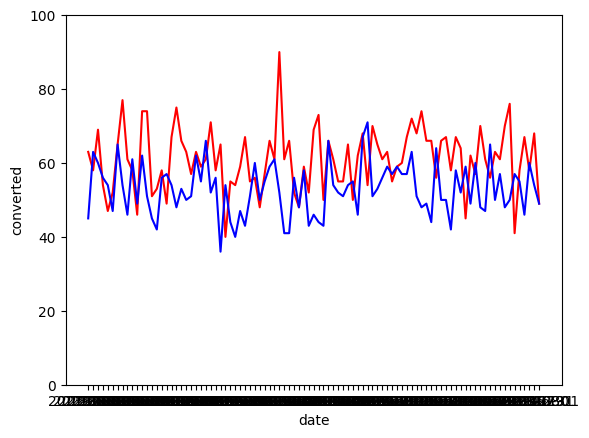

In [92]:
# построим график, отражающий количество оформленных карт по дням

sns.lineplot(data= test_n_by_date, color = "red")
sns.lineplot(data= control_n_by_date, color ="blue")

plt.ylim(0, 100)

(0.0, 0.2)

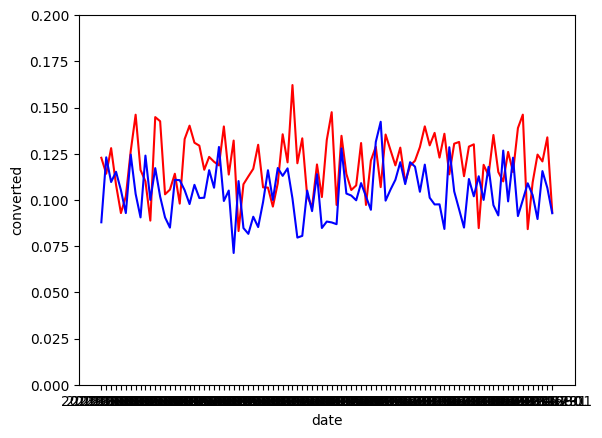

In [95]:
# построим график, отражающий конверсию из посещений в оформленние карт по дням

sns.lineplot(data= test_conv_by_date, color = "red")
sns.lineplot(data= control_conv_by_date, color ="blue")

plt.ylim(0, 0.2)

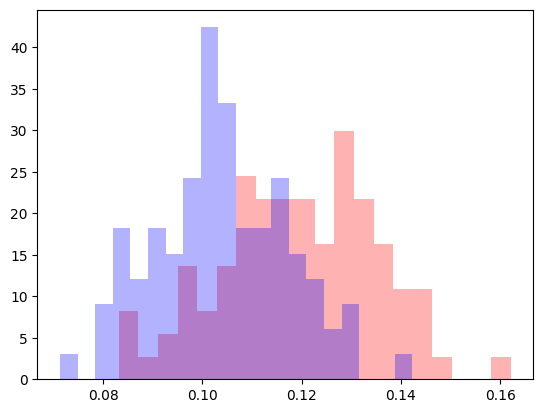

In [96]:
# построим распределения средних значений по дням в тесте и в контроле
# на что похоже это распределение?

plt.hist(test_conv_by_date, 20, density=True,color='r',alpha=0.3 )
plt.hist(control_conv_by_date, 20, density=True,color='b',alpha=0.3 )

plt.show()

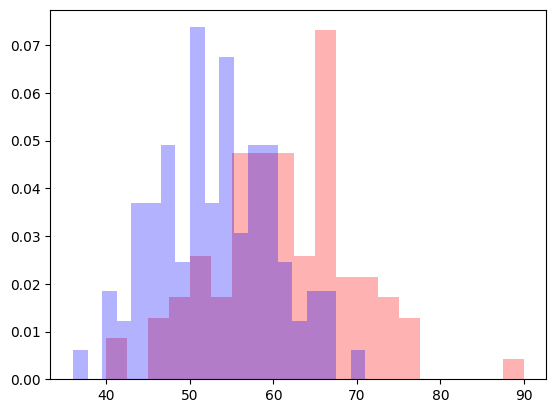

In [97]:
plt.hist(test_n_by_date, 20, density=True,color='r',alpha=0.3 )
plt.hist(control_n_by_date, 20, density=True,color='b',alpha=0.3 )

plt.show()

In [98]:
# теперь используем знание о том, что средние конверсии распределены нормально
# используйте статистический тест и проинтерпретируйте результаты
# как меняется ваш результат в зависимости от принятого вами уровня значимости?

from scipy.stats import ttest_ind

ttest_ind(test_conv_by_date, control_conv_by_date) # используйте документацию, test_conv_by_date, control_conv_by_date, чтобы провести тест


TtestResult(statistic=np.float64(7.209029622736518), pvalue=np.float64(1.4124701519287306e-11), df=np.float64(184.0))

In [ ]:
# используйте тот же статистический тест, чтобы оценить, отличаются ли  и проинтерпретируйте результаты
# как меняется ваш результат в зависимости от принятого вами уровня значимости?

ttest_ind() # используйте документацию, test_n_by_date, control_n_by_date, чтобы провести тест